#### Setup
We first set the notebook to display the output from each code block,. <br>
then import the required packages and set the file directory.

In [9]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from shapely.geometry import Point
import matplotlib.pyplot as plt
from rasterio.mask import mask
from rasterio.plot import show
from rasterio.plot import plotting_extent
from natsort import natsorted
import earthpy.spatial as es
import pandas as pd
import geopandas
import rasterio
import pycrs
import os

file_dir=r'/Users/neeraj/BTP'

#### Read in environmental data
Next the environmental variable rasters are read in and their locations are saved in a list 
for stacking.

In [10]:
#ENVIREM dataset
#create list of raster file locations and a list containing only the names of each raster
list_envirem_files=[]
names_envirem=[]

#add files to these lists
for root, dirs, files in os.walk(file_dir+"/data/GIS/5_deg"):
    for file in files:
        if file.endswith('.tif'):
            list_envirem_files.append(file_dir+"/data/GIS/5_deg/"+file)
            name=file.replace(".tif","")
            names_envirem.append(name)
            names_envirem=natsorted(names_envirem,key=lambda y: y.lower())
            
    
#BIOCLIM dataset
#create list of raster file locations and a list containing only the names of each raster
list_bioclim_files=[]
names_bioclim=[]

for root, dirs, files in os.walk(file_dir+"/data/GIS/wc5"):
    for file in files:
        if file.endswith('.tif'):
            list_bioclim_files.append(file_dir+"/data/GIS/wc5/"+file)
            name=file.replace(".tif","")
            names_bioclim.append(name)
            names_bioclim=natsorted(names_bioclim,key=lambda y: y.lower())


{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.3999999521443642e+38, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS84",6378137,298.257223563],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


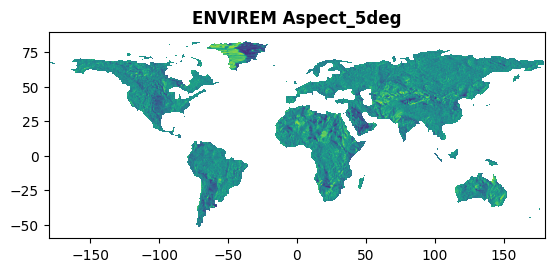

<AxesSubplot: title={'center': 'ENVIREM Aspect_5deg'}>

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.3999999521443642e+38, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS84",6378137,298.257223563],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


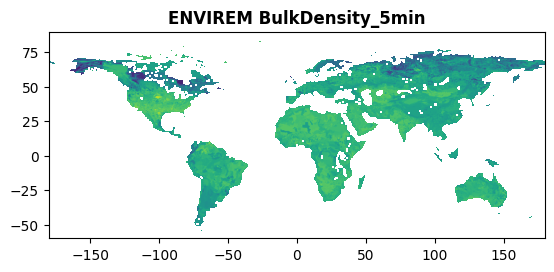

<AxesSubplot: title={'center': 'ENVIREM BulkDensity_5min'}>

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.3999999521443642e+38, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS84",6378137,298.257223563],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


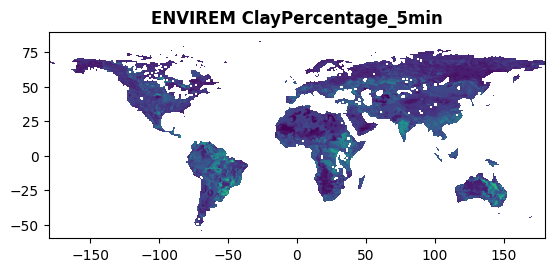

<AxesSubplot: title={'center': 'ENVIREM ClayPercentage_5min'}>

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS84",6378137,298.257223563],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


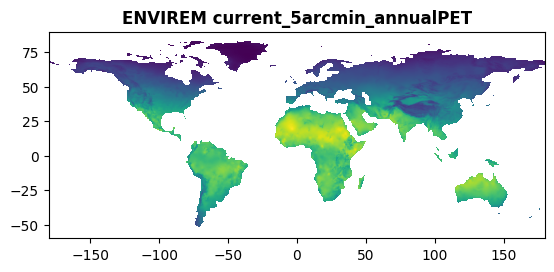

<AxesSubplot: title={'center': 'ENVIREM current_5arcmin_annualPET'}>

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS84",6378137,298.257223563],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


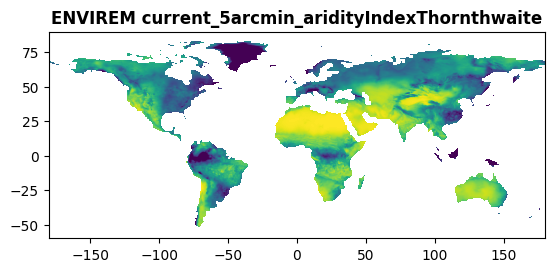

<AxesSubplot: title={'center': 'ENVIREM current_5arcmin_aridityIndexThornthwaite'}>

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


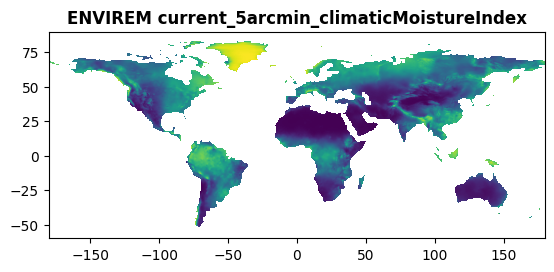

<AxesSubplot: title={'center': 'ENVIREM current_5arcmin_climaticMoistureIndex'}>

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS84",6378137,298.257223563],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


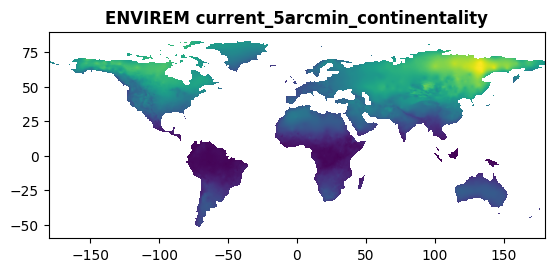

<AxesSubplot: title={'center': 'ENVIREM current_5arcmin_continentality'}>

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS84",6378137,298.257223563],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


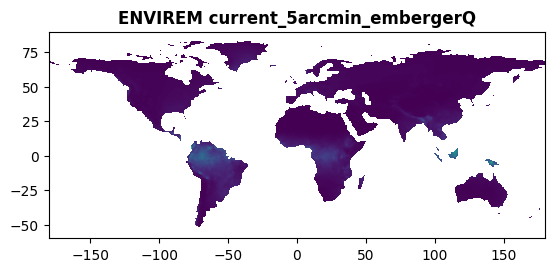

<AxesSubplot: title={'center': 'ENVIREM current_5arcmin_embergerQ'}>

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS84",6378137,298.257223563],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


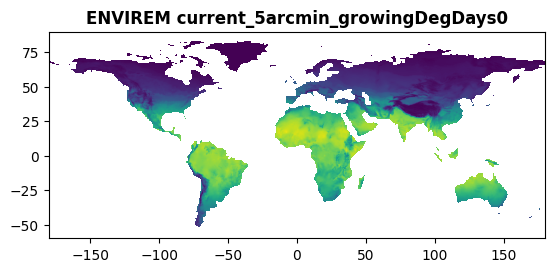

<AxesSubplot: title={'center': 'ENVIREM current_5arcmin_growingDegDays0'}>

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS84",6378137,298.257223563],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


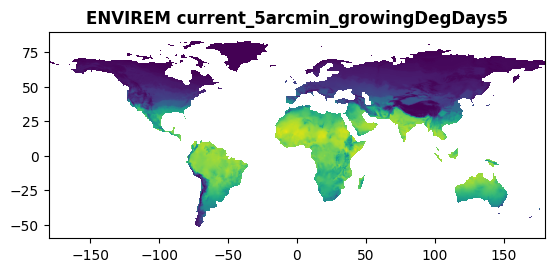

<AxesSubplot: title={'center': 'ENVIREM current_5arcmin_growingDegDays5'}>

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS84",6378137,298.257223563],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


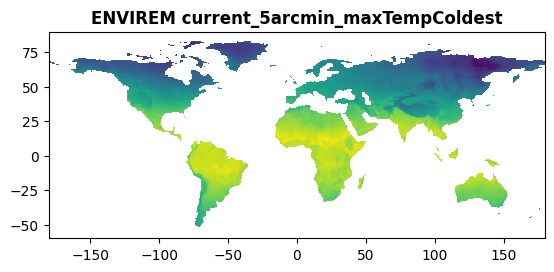

<AxesSubplot: title={'center': 'ENVIREM current_5arcmin_maxTempColdest'}>

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS84",6378137,298.257223563],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


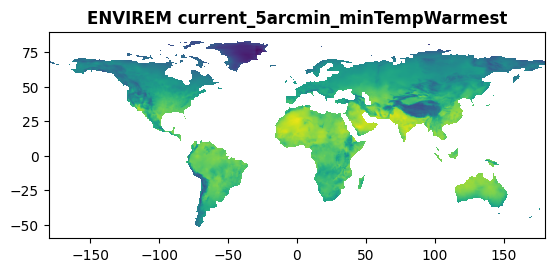

<AxesSubplot: title={'center': 'ENVIREM current_5arcmin_minTempWarmest'}>

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS84",6378137,298.257223563],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


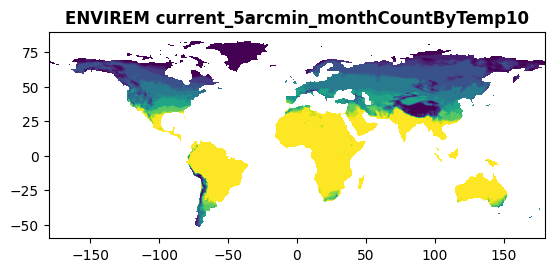

<AxesSubplot: title={'center': 'ENVIREM current_5arcmin_monthCountByTemp10'}>

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS84",6378137,298.257223563],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


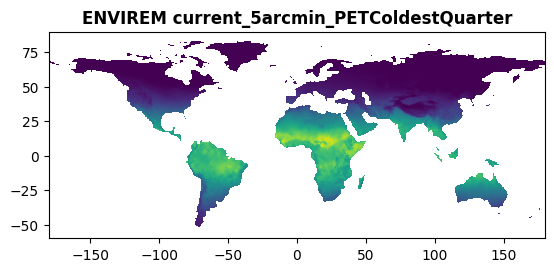

<AxesSubplot: title={'center': 'ENVIREM current_5arcmin_PETColdestQuarter'}>

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS84",6378137,298.257223563],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


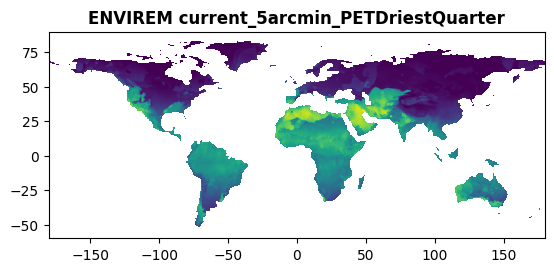

<AxesSubplot: title={'center': 'ENVIREM current_5arcmin_PETDriestQuarter'}>

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS84",6378137,298.257223563],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


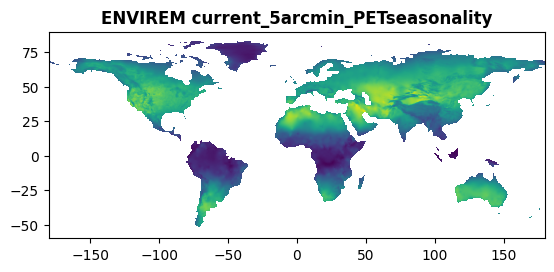

<AxesSubplot: title={'center': 'ENVIREM current_5arcmin_PETseasonality'}>

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS84",6378137,298.257223563],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


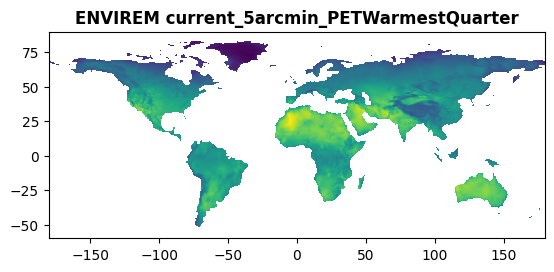

<AxesSubplot: title={'center': 'ENVIREM current_5arcmin_PETWarmestQuarter'}>

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS84",6378137,298.257223563],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


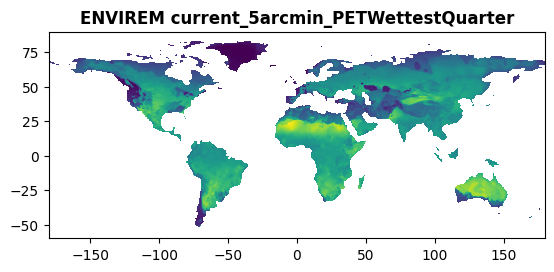

<AxesSubplot: title={'center': 'ENVIREM current_5arcmin_PETWettestQuarter'}>

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS84",6378137,298.257223563],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


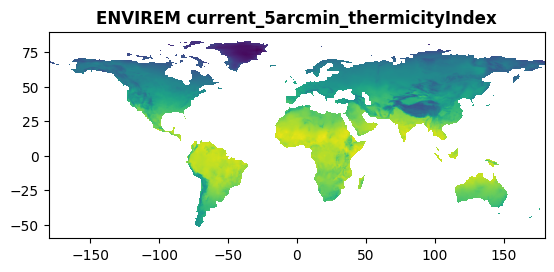

<AxesSubplot: title={'center': 'ENVIREM current_5arcmin_thermicityIndex'}>

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.3999999521443642e+38, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS84",6378137,298.257223563],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


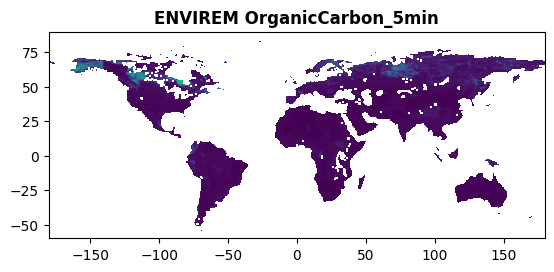

<AxesSubplot: title={'center': 'ENVIREM OrganicCarbon_5min'}>

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.3999999521443642e+38, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS84",6378137,298.257223563],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


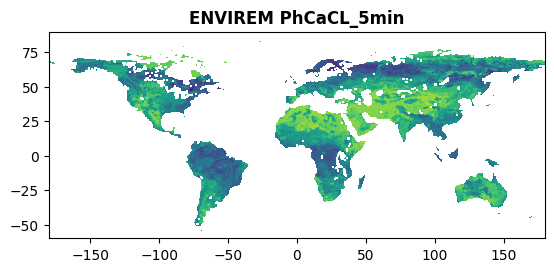

<AxesSubplot: title={'center': 'ENVIREM PhCaCL_5min'}>

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.3999999521443642e+38, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS84",6378137,298.257223563],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


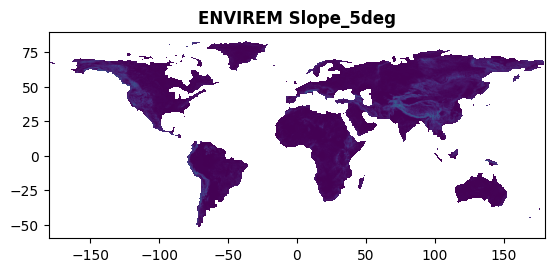

<AxesSubplot: title={'center': 'ENVIREM Slope_5deg'}>

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


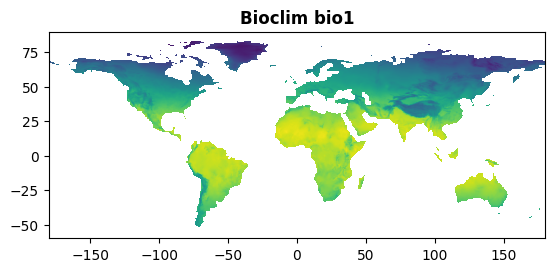

<AxesSubplot: title={'center': 'Bioclim bio1'}>

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


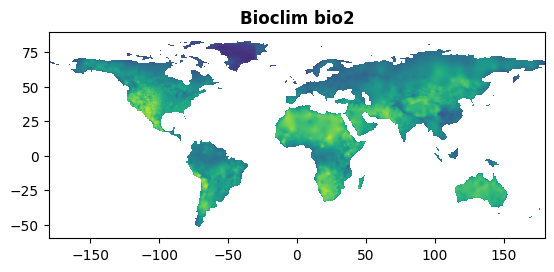

<AxesSubplot: title={'center': 'Bioclim bio2'}>

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


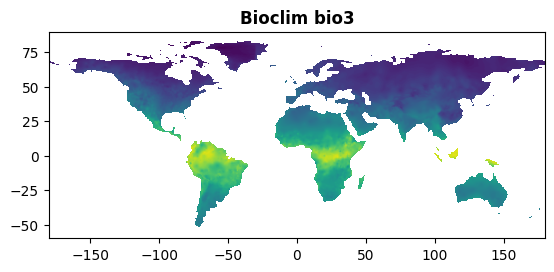

<AxesSubplot: title={'center': 'Bioclim bio3'}>

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


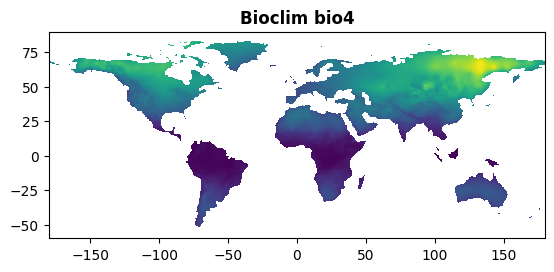

<AxesSubplot: title={'center': 'Bioclim bio4'}>

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


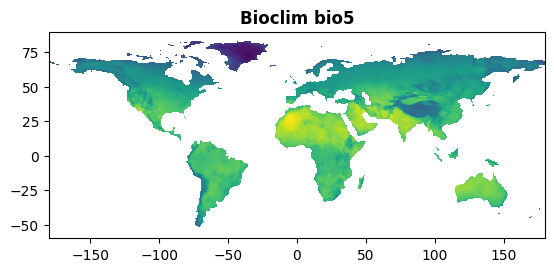

<AxesSubplot: title={'center': 'Bioclim bio5'}>

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


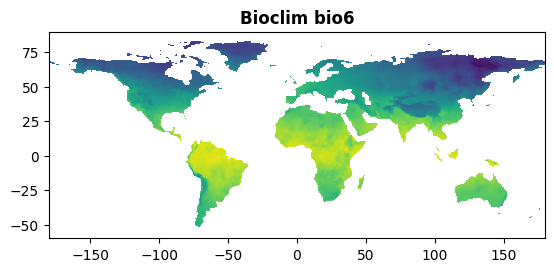

<AxesSubplot: title={'center': 'Bioclim bio6'}>

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


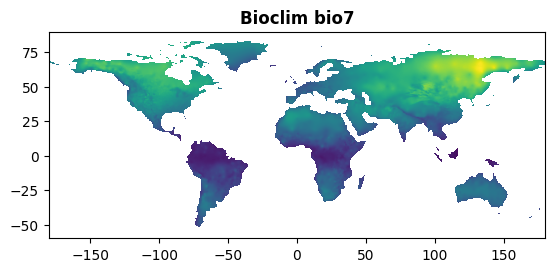

<AxesSubplot: title={'center': 'Bioclim bio7'}>

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


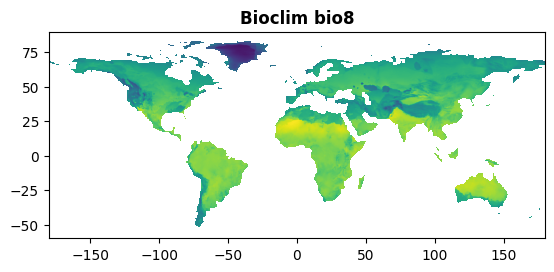

<AxesSubplot: title={'center': 'Bioclim bio8'}>

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


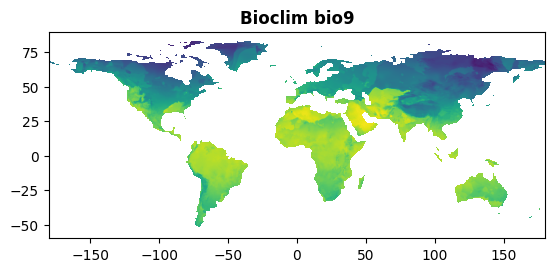

<AxesSubplot: title={'center': 'Bioclim bio9'}>

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


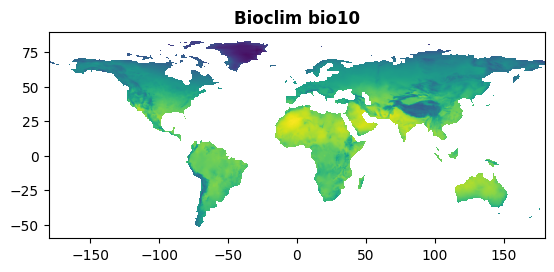

<AxesSubplot: title={'center': 'Bioclim bio10'}>

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


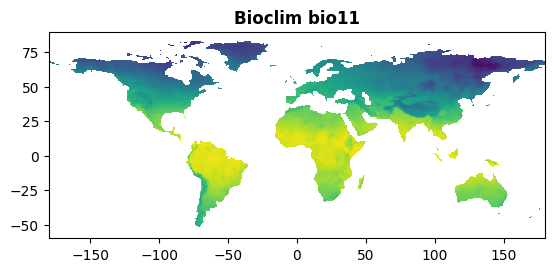

<AxesSubplot: title={'center': 'Bioclim bio11'}>

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


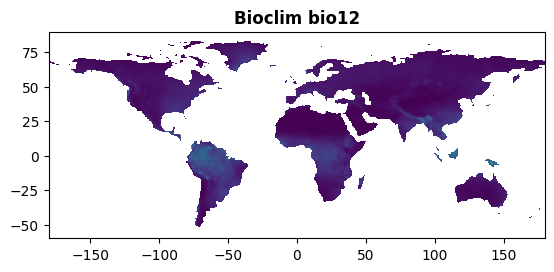

<AxesSubplot: title={'center': 'Bioclim bio12'}>

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


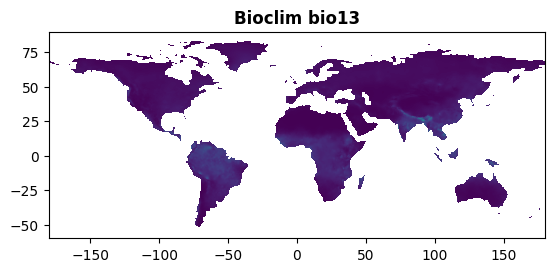

<AxesSubplot: title={'center': 'Bioclim bio13'}>

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


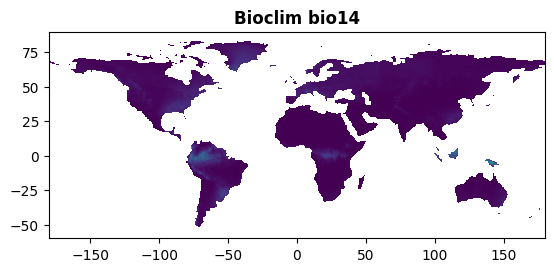

<AxesSubplot: title={'center': 'Bioclim bio14'}>

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


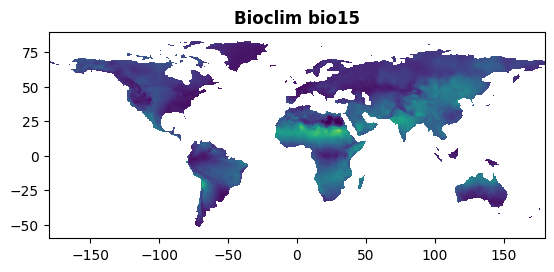

<AxesSubplot: title={'center': 'Bioclim bio15'}>

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


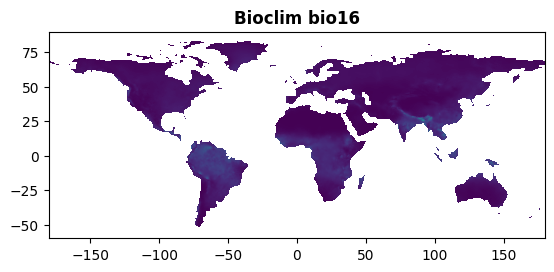

<AxesSubplot: title={'center': 'Bioclim bio16'}>

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


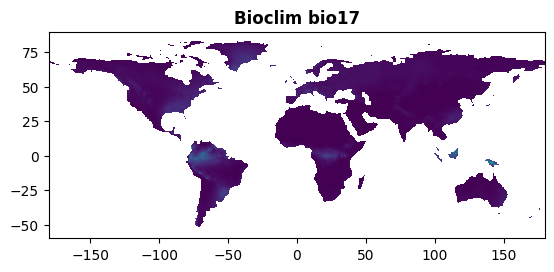

<AxesSubplot: title={'center': 'Bioclim bio17'}>

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


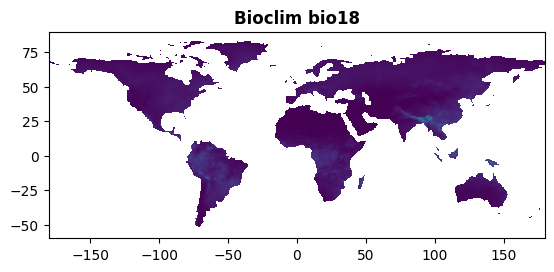

<AxesSubplot: title={'center': 'Bioclim bio18'}>

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


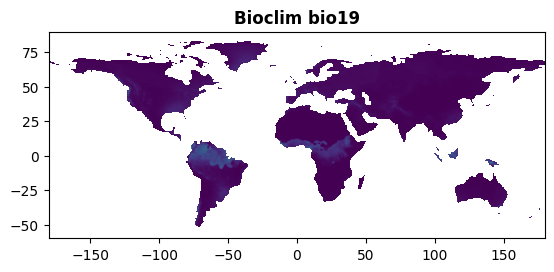

<AxesSubplot: title={'center': 'Bioclim bio19'}>

In [11]:
#Inspect the raster maps
for name in names_envirem:
    raster=rasterio.open(file_dir+"/data/GIS/5_deg/"+name+".tif")
    print(raster.meta) #inspect meta information
    show(raster,title="ENVIREM %s"%name)
    
for name in names_bioclim:
    raster=rasterio.open(file_dir+"/data/GIS/wc5/"+name+".tif") 
    print(raster.meta) #inspect meta information
    show(raster, title="Bioclim %s"%name)

#### Stack the raster files
The raster files can now be stacked to create a single raster file. The names of the variables are stored in a separate text file. <br> 
The output files (as well as the clipped outputs later) will be too large to store on github. Therefore they are stored in a different path.

In [13]:
#ENVIREM+BIOCLIM dataset
list_envirem_bioclim_files=[]
for item in list_envirem_files:
    list_envirem_bioclim_files.append(item)
for item in list_bioclim_files:
    list_envirem_bioclim_files.append(item)

names_envirem_bioclim=[]
for item in names_envirem:
    names_envirem_bioclim.append(item)
for item in names_bioclim:
    names_envirem_bioclim.append(item)
    
#save the names of the variables in order to list
with open(file_dir+'/data/GIS/env_stacked/variable_list.txt', 'w') as f:
    for item in names_envirem_bioclim:
        f.write("%s\n" % item)      
        
es.stack(list_envirem_bioclim_files, file_dir+'/data/GIS/env_stacked/ENVIREM_BIOCLIM_stacked.tif')
#this stacked file is too large to put on github, so put them in gitignore

12

17

20

26

41

38

31

26

32

32

31

31

35

34

33

31

34

34

32

19

12

11

5

5

5

5

5

5

5

5

5

6

6

6

6

6

6

6

6

6

6

(array([[[-9.999e+03, -9.999e+03, -9.999e+03, ..., -9.999e+03,
          -9.999e+03, -9.999e+03],
         [-9.999e+03, -9.999e+03, -9.999e+03, ..., -9.999e+03,
          -9.999e+03, -9.999e+03],
         [-9.999e+03, -9.999e+03, -9.999e+03, ..., -9.999e+03,
          -9.999e+03, -9.999e+03],
         ...,
         [-9.999e+03, -9.999e+03, -9.999e+03, ..., -9.999e+03,
          -9.999e+03, -9.999e+03],
         [-9.999e+03, -9.999e+03, -9.999e+03, ..., -9.999e+03,
          -9.999e+03, -9.999e+03],
         [-9.999e+03, -9.999e+03, -9.999e+03, ..., -9.999e+03,
          -9.999e+03, -9.999e+03]],
 
        [[-3.400e+38, -3.400e+38, -3.400e+38, ..., -3.400e+38,
          -3.400e+38, -3.400e+38],
         [-3.400e+38, -3.400e+38, -3.400e+38, ..., -3.400e+38,
          -3.400e+38, -3.400e+38],
         [-3.400e+38, -3.400e+38, -3.400e+38, ..., -3.400e+38,
          -3.400e+38, -3.400e+38],
         ...,
         [-3.400e+38, -3.400e+38, -3.400e+38, ..., -3.400e+38,
          -3.400e+38, -3